# Multilayer Perceptron

After the first notebook, we now have an impression on what neural networks and deep learning are capable of. But one question remained open:
<center>__What is a neural network?__</center>

The most basic form of a neural network is the **multi-layer perceptron (MLP)** and goes back to Frank Rosenblatt (1957).

<img src="images/rosenblatt.jpeg" alt="Image of Perceptron" style="width: 600px;"/>
http://videolectures.net/site/normal_dl/tag=983658/deeplearning2015_bottou_neural_networks_01.pdf.

## Definition of MLP

Mathematically speaking, an MLP is a function $f: \mathbb{R}^p \to \mathbb{R}^m$ that is written in the form 
$$f(x) = a_L(W_L \cdot a_{L-1}(W_{L-1}\cdots a_2(W_2 \cdot a_1(W_1 \cdot x + b_1) + b_2)\cdots) + b_{L}),$$
where the 
1. $W_i \in \mathbb{R}^{\ell_i \times \ell_{i-1}}$ are **weight matrices**, 
2. $b_i \in \mathbb{R}^{\ell_i}$ are **biases**, and
3. and $a_i:\mathbb{R}^{\ell_i} \to \mathbb{R}^{\ell_i}$ are **activation functions**.

<img src="images/iris.jpg"  alt="Image Iris flower"  style="width: 900px;"/>

<img src="images/mlp.png" alt="Image of MLP for Iris dataset"  style="width: 900px;"/>
https://www.tensorflow.org/get_started/premade_estimators

### Example: Linear Regression

Choosing $L=1$ and $a(x) = x$ as the identity, gives $f(x) = W x + b$. In particular, linear regression is a special case of an MLP.

Now, we implement a basic MLP directly via matrices. Later in the lecture, we work with Google's [tensorflow](https://www.tensorflow.org/), a powerful and well-documented library specifically designed for the needs of deep learning.

The linear model can be realized conveniently in R.

In [12]:
input_dim <- 5

W <- matrix(runif(input_dim), 1)
b <- 0

Given the initial weights, we can evaluate the model on input data.

In [14]:
X <- runif(5)
pred <- W %*%  X + b

### Example: Logistic Regression

Next, choosing $L=1$ and $a(x) = \tfrac{1}{1+e^{-x}}$ recovers the case of logistic regression. That is,  
$$f(x) = \frac{1}{1 + e^{-W x - b}}$$

In [17]:
sigmoid <- function(x)
    1 / (1 + exp(-x))

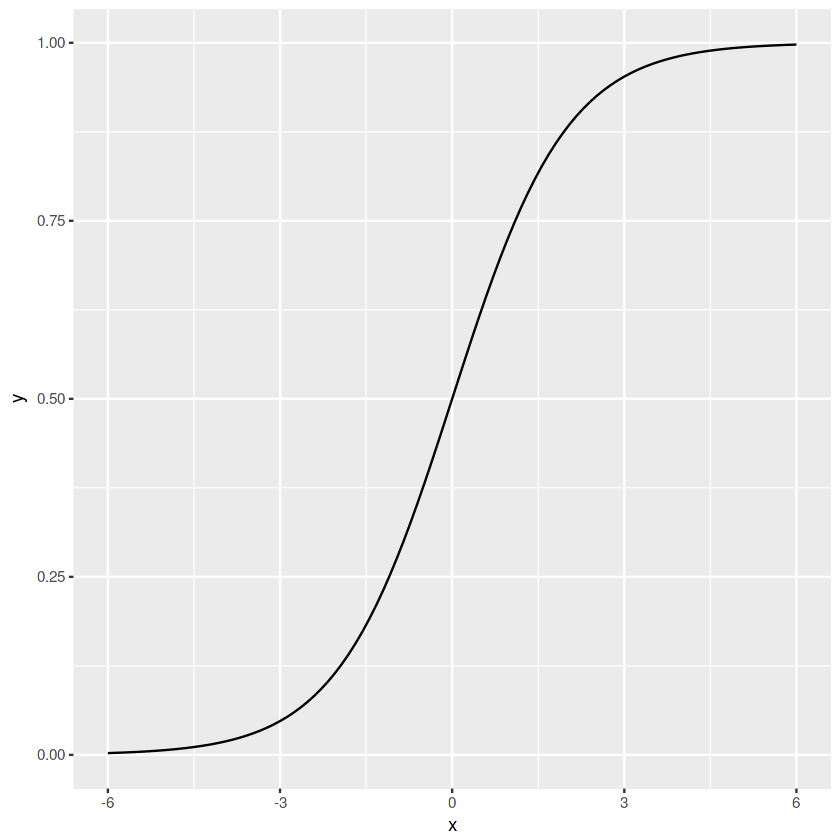

In [18]:
library(ggplot2)

ggplot(data = data.frame(x = 0), mapping = aes(x = x)) + 
 stat_function(fun = sigmoid) +
 xlim(-6,6)


### Example: Softmax

The example of logistic regression described above is only suitable for distinguishing two classes. The multi-class analog of the sigmoid is known as **soft-max**.

Suppose $x \in \mathbb R^m$ is an $m$-dimensional feature-vector. Then, for a weight-matrix $W \in \mathbb R^{m \times p}$ and a bias-vector $b \in \mathbb R^m$, we set $z = Wx + b$. The **soft-max** of $z$ is defined as the vector whose $k$th component equals
$$\frac{e^{z_k}}{\sum_{i \le n} e^{z_i}}.$$

### ReLU

The non-linearity in the last layer of an MLP is dictated by the specific nature of the task.
1. Regression -> linear 
2. Binary prediction -> sigmoid
3. Multiclass prediction -> softmax

There is much more freedom when it comes to selecting the non-linearity between the layers. One popular choice is the **Rectified Linear Unit (ReLU)**
$$\mathsf{ReLU}(x) = \max\{x, 0\}.$$
As we will learn in the [next lecture](./backprop.ipynb), this seemingly innocent activation function has now become one of the cornerstones of any deep network architecture.

In [38]:
reLU <- function(x)
    sapply(x, function(x) max(x, 0))

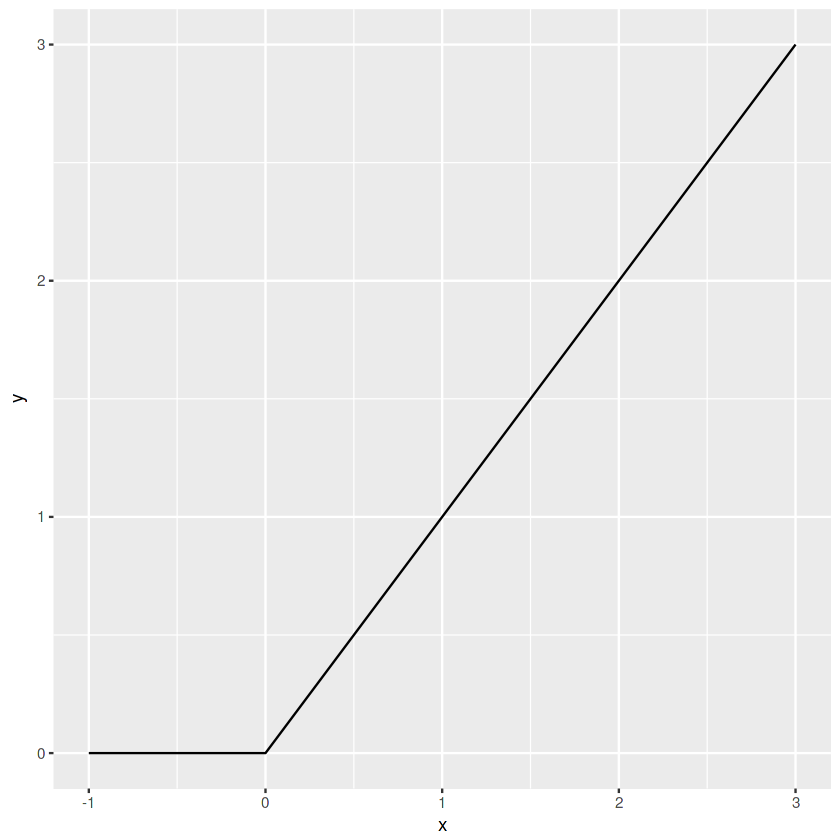

In [39]:
ggplot(data = data.frame(x = 0), mapping = aes(x = x)) + 
 stat_function(fun = reLU) +
 xlim(-1,3) +
 ylim(0,3)


## Loss Functions

Typically, we want to fit a neural network to training data $\{(x_1, y_1), \ldots, (x_n, y_n)\}$ where the $x_i$ are the model input and $y_i$ is the observed outcome for the $i$th traings datum. In neural networks, the prevailing approach to achieve this goal is the minimization of a suitable **Loss Function** 
$$ L(\{(y_i, f(x_i))\}_i) = \frac1N \sum_i \ell(y_i, f(x_i))$$
between the true outcomes $y_i$ and the predictions $f(x_i)$.

In regression settings, a typical choice of a loss function would the **Mean-Squared Error (MSE)**, i.e.,
$$\ell_{\mathsf{MSE}}(y, f(x)) = (y - f(x))^2.$$
In binary prediction problems, we would use the **Binary-Crossentropy Loss**
$$\ell_{\mathsf{CE}}(y, f(x)) = -y \log(f(x)) - (1 - y) \log(1 - f(x))$$

As we will see in the problem classes, these approaches are equivalent to maximum likelihood estimation in the settings of linear and logistic regression, respectively.

In general, the choice of an appropriate loss function can be an art. It can mean the difference as to whether or not a problem at hand is accessible via deep learning or not. 